In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import yt
import h5py
from yt.data_objects.particle_filters import add_particle_filter
from yt.analysis_modules.halo_analysis.halo_catalog import HaloCatalog


In [2]:
# my dm filter
def DarkM(pfilter,data):
    age_all = np.array(data['all','particle_age'],dtype=np.float64)
    val,conunts =  np.unique(age_all,return_counts=True)
    filter=data[("all","particle_age")]==val[np.argmax(conunts)]
    return filter

def Stars(pfilter,data):
    age_all = np.array(data['all','particle_age'],dtype=np.float64)
    val,conunts =  np.unique(age_all,return_counts=True)
    filter=data[('all','particle_age')]!=val[np.argmax(conunts)]
    return filter



In [3]:
add_particle_filter('DM',function=DarkM, filtered_type='all',requires=["particle_age"])
add_particle_filter('stars',function=Stars, filtered_type='all',requires=["particle_age"])



In [4]:
def MaxResDarkMatter(pfilter, data):
    return data[('DM','particle_mass')] == data[('DM','particle_mass')].min()
# add filter
add_particle_filter("max_res_dark_matter",filtered_type='DM', function=MaxResDarkMatter, requires=["particle_mass"])



In [5]:
fn = "/data/POL/HALOB/output_00417/info_00417.txt"
# load data
ds = yt.load(fn)
ad = ds.all_data()

yt : [INFO     ] 2017-06-30 11:11:57,766 Parameters: current_time              = 0.986596082171
yt : [INFO     ] 2017-06-30 11:11:57,767 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2017-06-30 11:11:57,768 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-06-30 11:11:57,769 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2017-06-30 11:11:57,771 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-06-30 11:11:57,771 Parameters: current_redshift          = -5.79180090199e-05
yt : [INFO     ] 2017-06-30 11:11:57,772 Parameters: omega_lambda              = 0.723999977112
yt : [INFO     ] 2017-06-30 11:11:57,773 Parameters: omega_matter              = 0.275999993086
yt : [INFO     ] 2017-06-30 11:11:57,774 Parameters: hubble_constant           = 0.703000030518


In [7]:
ds.add_particle_filter('DM')
ds.add_particle_filter('stars')
ds.add_particle_filter('max_res_dark_matter')
ds.derived_field_list

/usr/local/lib/python2.7/dist-packages/yt/units/yt_array.py:975: RuntimeWarning: divide by zero encountered in divide
  return super(YTArray, self).__div__(ro)
/usr/local/lib/python2.7/dist-packages/yt/units/yt_array.py:975: RuntimeWarning: invalid value encountered in divide
  return super(YTArray, self).__div__(ro)


[('DM', 'age'),
 ('DM', 'mesh_id'),
 ('DM', 'particle_age'),
 ('DM', 'particle_angular_momentum'),
 ('DM', 'particle_angular_momentum_magnitude'),
 ('DM', 'particle_angular_momentum_x'),
 ('DM', 'particle_angular_momentum_y'),
 ('DM', 'particle_angular_momentum_z'),
 ('DM', 'particle_cylindrical_velocity_theta'),
 ('DM', 'particle_cylindrical_velocity_z'),
 ('DM', 'particle_identifier'),
 ('DM', 'particle_index'),
 ('DM', 'particle_mass'),
 ('DM', 'particle_metallicity'),
 ('DM', 'particle_ones'),
 ('DM', 'particle_position'),
 ('DM', 'particle_position_cylindrical_radius'),
 ('DM', 'particle_position_cylindrical_theta'),
 ('DM', 'particle_position_cylindrical_z'),
 ('DM', 'particle_position_relative'),
 ('DM', 'particle_position_relative_x'),
 ('DM', 'particle_position_relative_y'),
 ('DM', 'particle_position_relative_z'),
 ('DM', 'particle_position_spherical_phi'),
 ('DM', 'particle_position_spherical_radius'),
 ('DM', 'particle_position_spherical_theta'),
 ('DM', 'particle_position_

In [8]:
ad['max_res_dark_matter', 'particle_mass']

YTArray([  4.61265461e+38,   4.61265461e+38,   4.61265461e+38, ...,
         4.61265461e+38,   4.61265461e+38,   4.61265461e+38]) g

In [6]:
age = np.array(ad['io','particle_age'],dtype=np.float64)
val ,counts = np.unique(age,return_counts=True)


In [8]:
print val[(counts==counts.max())]
print counts[(counts==counts.max())]

[  5.71176002e-05]
[10550044]


In [10]:
# finding halos
hc = HaloCatalog(data_ds=ds, finder_method='fof',
                 finder_kwargs={'dm_only':False,'ptype':'max_res_dark_matter'})
hc.create()


yt : [INFO     ] 2017-06-30 11:18:33,495 Using a linking length of 8.570e-04
yt : [INFO     ] 2017-06-30 11:18:33,496 Initializing FOF
yt : [INFO     ] 2017-06-30 11:26:49,361 Parsing outputs
yt : [INFO     ] 2017-06-30 11:35:08,014 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-06-30 11:35:08,014 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-06-30 11:35:08,015 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-06-30 11:35:08,016 Parameters: domain_right_edge         = [  6.13406805e+25   6.13406805e+25   6.13406805e+25]
yt : [INFO     ] 2017-06-30 11:35:08,017 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2017-06-30 11:35:08,019 Allocating for 7.321e+03 particles (index particle type 'all')
yt : [INFO     ] 2017-06-30 11:35:08,022 Identified 6.810e+02 octs
yt : [INFO     ] 2017-06-30 11:35:11,216 Saving halo catalog (7321 halos) to halo_catalogs/catalog/catalog.


yt : [INFO     ] 2017-06-30 11:36:20,074 xlim = 0.000000 1.000000
yt : [INFO     ] 2017-06-30 11:36:20,075 ylim = 0.000000 1.000000
yt : [INFO     ] 2017-06-30 11:36:20,077 xlim = 0.000000 1.000000
yt : [INFO     ] 2017-06-30 11:36:20,078 ylim = 0.000000 1.000000
yt : [INFO     ] 2017-06-30 11:36:20,079 Splatting (('all', 'particle_ones')) onto a 800 by 800 mesh



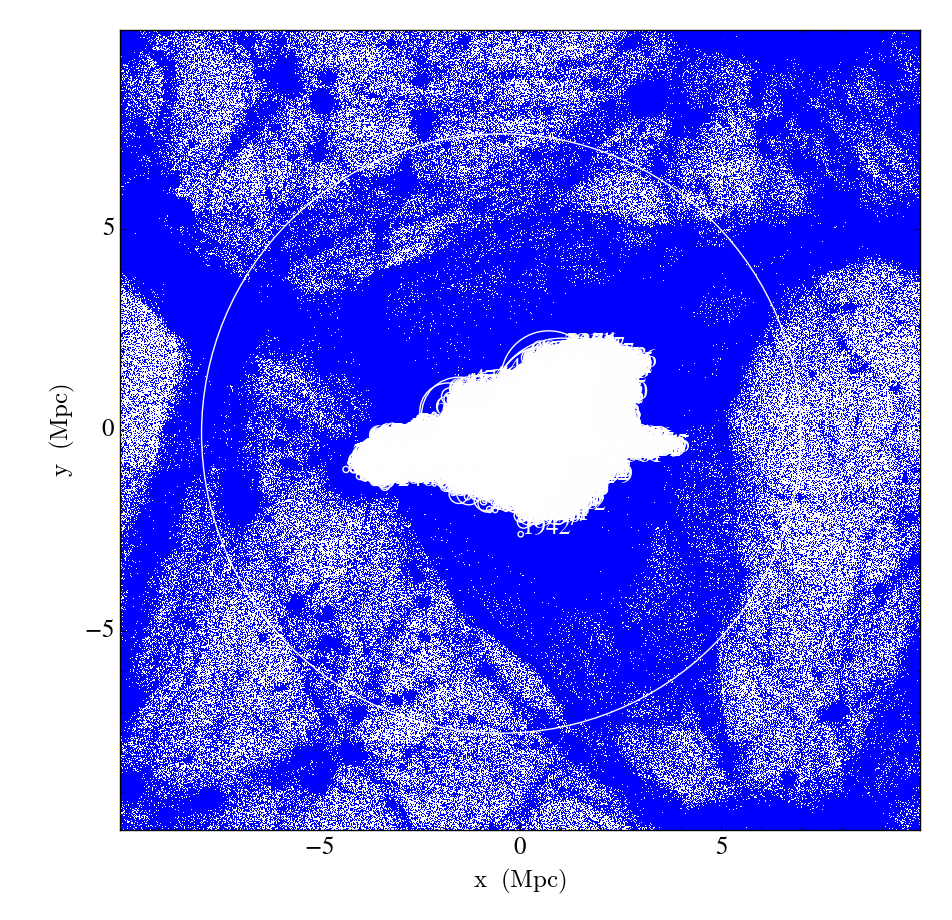

In [11]:
#p = yt.ParticlePlot(ds, ('max_res_dark_matter','particle_position_x'), ('max_res_dark_matter','particle_position_y'))
p = yt.ParticlePlot(ds, 'particle_position_x','particle_position_y')
#p = yt.ProjectionPlot(ds,'z','density')
p.annotate_halos(hc, annotate_field = 'particle_identifier', width=(100,'Mpc'), factor=2)

In [12]:
hc.save_catalog()



yt : [INFO     ] 2017-06-30 11:36:50,382 Saving halo catalog (7321 halos) to halo_catalogs/catalog/catalog.


In [13]:
halos = yt.load("halo_catalogs/catalog/catalog.0.h5")

yt : [INFO     ] 2017-06-30 11:37:06,857 Parameters: current_time              = 4.32299832787e+17
yt : [INFO     ] 2017-06-30 11:37:06,858 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-06-30 11:37:06,860 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-06-30 11:37:06,862 Parameters: domain_right_edge         = [  6.13406805e+25   6.13406805e+25   6.13406805e+25]
yt : [INFO     ] 2017-06-30 11:37:06,863 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-06-30 11:37:06,864 Parameters: current_redshift          = -5.79180090199e-05
yt : [INFO     ] 2017-06-30 11:37:06,865 Parameters: omega_lambda              = 0.723999977112
yt : [INFO     ] 2017-06-30 11:37:06,866 Parameters: omega_matter              = 0.275999993086
yt : [INFO     ] 2017-06-30 11:37:06,867 Parameters: hubble_constant           = 0.703000030518


In [14]:
halos.field_list

yt : [INFO     ] 2017-06-30 11:37:10,675 Allocating for 7.321e+03 particles (index particle type 'all')
yt : [INFO     ] 2017-06-30 11:37:10,682 Identified 2.425e+03 octs


[('all', u'particle_identifier'),
 ('all', u'particle_mass'),
 ('all', u'particle_position_x'),
 ('all', u'particle_position_y'),
 ('all', u'particle_position_z'),
 ('all', u'virial_radius'),
 ('halos', u'particle_identifier'),
 ('halos', u'particle_mass'),
 ('halos', u'particle_position_x'),
 ('halos', u'particle_position_y'),
 ('halos', u'particle_position_z'),
 ('halos', u'virial_radius')]

In [15]:
par_x = np.array(ad['particle_position_x'].in_units('pc'),dtype=np.float64)
par_y = np.array(ad['particle_position_y'].in_units('pc'),dtype=np.float64)
par_z = np.array(ad['particle_position_z'].in_units('pc'),dtype=np.float64)
par_mass = np.array(ad['particle_mass'],dtype=np.float64)

In [16]:
bin_num = 200
xedges = np.linspace(par_x.min(),par_x.max(),bin_num)
yedges = np.linspace(par_y.min(),par_y.max(),bin_num)
lim = 2e6
par_con = (par_z>4e1)&(par_z<4.4e8)
# Sort out Particles
H, xedges, yedges = np.histogram2d(par_x[par_con], par_y[par_con], bins=(xedges, yedges),weights=par_mass[par_con])
H = H.T

# Sort out halos
halos_data = halos.all_data()
halos_x = halos_data['halos', u'particle_position_x'].in_units('pc')
halos_y = halos_data['halos', u'particle_position_y'].in_units('pc')
halos_z = halos_data['halos', u'particle_position_z'].in_units('pc')
halos_con = (halos_z>0)&(halos_z<2.2e40)
halos_x_f = halos_x[halos_con]
halos_y_f = halos_y[halos_con]

In [22]:
par_z.min()

1.6722092714817696

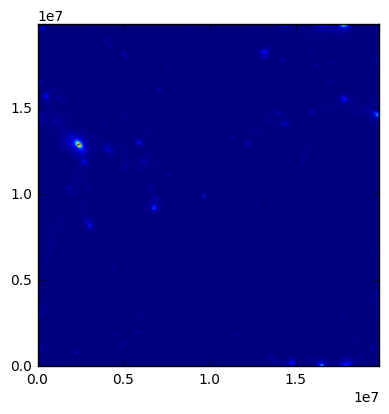

In [17]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(131)
plt.imshow(H, interpolation='bilinear', origin='low',
         extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
#ax.scatter(halos_x*5e4/2.5e26,halos_y*5e4/2.5e26,facecolor=None)
#ax.scatter(halos_x,halos_y,marker='o', color='white')

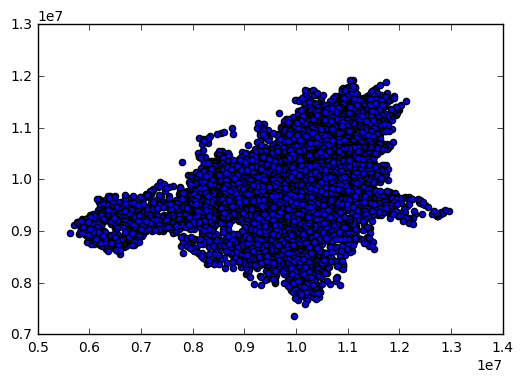

In [18]:
fig, ax =plt.subplots()
ax.scatter(halos_x,halos_y)

#for i in range(0,len(halos_r)):
#    circle = plt.Circle(((halos_x[i]),(halos_y[i])),
#                          halos_r, color='r',lw=1, fill=False)
#    ax.add_patch( circle )

In [19]:
halos_data = halos.all_data()

In [20]:
halos.field_list

[('all', u'particle_identifier'),
 ('all', u'particle_mass'),
 ('all', u'particle_position_x'),
 ('all', u'particle_position_y'),
 ('all', u'particle_position_z'),
 ('all', u'virial_radius'),
 ('halos', u'particle_identifier'),
 ('halos', u'particle_mass'),
 ('halos', u'particle_position_x'),
 ('halos', u'particle_position_y'),
 ('halos', u'particle_position_z'),
 ('halos', u'virial_radius')]

In [21]:
halos_x = halos_data['halos', u'particle_position_x'].in_units('pc')
halos_y = halos_data['halos', u'particle_position_y'].in_units('pc')

